多層のdeepencoderでより少ない要素数で４と９を分離できるだろうか？

In [2]:
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [3]:
import numpy as np

In [4]:
batch_size = 128
epochs = 300

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [5]:
keep_train_idx = np.logical_or(y_train == 4, y_train == 9)
keep_test_idx = np.logical_or(y_test ==4, y_test == 9)

x_train = x_train[keep_train_idx]
x_test = x_test[keep_test_idx]

In [6]:
x_train_vec = x_train.reshape(x_train.shape[0], 784)
x_test_vec = x_test.reshape(x_test.shape[0], 784)

中央の要素数は4個に設定する。

In [7]:
model = Sequential()
model.add(Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(Dropout(0.3))
model.add(Dense(4, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(100, activation='sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(784, activation='sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 404       
_________________________________________________________________
dropout_2 (Dropout)          (None, 4)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               500       
_________________________________________________________________
dropout_3 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               79184     
Total para

In [8]:
model.compile(loss='mean_squared_error',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train_vec, x_train_vec,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test_vec, x_test_vec))
score = model.evaluate(x_test_vec, x_test_vec, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 11791 samples, validate on 1991 samples
Epoch 1/300
11791/11791 [==============================] - 3s - loss: 0.0768 - acc: 0.0063 - val_loss: 0.0527 - val_acc: 0.0095
Epoch 2/300
11791/11791 [==============================] - 2s - loss: 0.0532 - acc: 0.0069 - val_loss: 0.0523 - val_acc: 0.0015
Epoch 3/300
11791/11791 [==============================] - 2s - loss: 0.0527 - acc: 0.0072 - val_loss: 0.0512 - val_acc: 0.0045
Epoch 4/300
11791/11791 [==============================] - 1s - loss: 0.0515 - acc: 0.0079 - val_loss: 0.0496 - val_acc: 0.0095
Epoch 5/300
11791/11791 [==============================] - 1s - loss: 0.0497 - acc: 0.0090 - val_loss: 0.0477 - val_acc: 0.0090
Epoch 6/300
11791/11791 [==============================] - 1s - loss: 0.0484 - acc: 0.0102 - val_loss: 0.0467 - val_acc: 0.0100
Epoch 7/300
11791/11791 [==============================] - 1s - loss: 0.0480 - acc: 0.0098 - val_loss: 0.0463 - val_acc: 0.0095
Epoch 8/300
11791/11791 [==============================

11791/11791 [==============================] - 1s - loss: 0.0425 - acc: 0.0105 - val_loss: 0.0382 - val_acc: 0.0131
Epoch 65/300
11791/11791 [==============================] - 1s - loss: 0.0425 - acc: 0.0104 - val_loss: 0.0381 - val_acc: 0.0141
Epoch 66/300
11791/11791 [==============================] - 1s - loss: 0.0424 - acc: 0.0118 - val_loss: 0.0381 - val_acc: 0.0141
Epoch 67/300
11791/11791 [==============================] - 1s - loss: 0.0424 - acc: 0.0096 - val_loss: 0.0379 - val_acc: 0.0121
Epoch 68/300
11791/11791 [==============================] - 1s - loss: 0.0423 - acc: 0.0105 - val_loss: 0.0380 - val_acc: 0.0146
Epoch 69/300
11791/11791 [==============================] - 1s - loss: 0.0423 - acc: 0.0103 - val_loss: 0.0380 - val_acc: 0.0146
Epoch 70/300
11791/11791 [==============================] - 1s - loss: 0.0423 - acc: 0.0103 - val_loss: 0.0379 - val_acc: 0.0131
Epoch 71/300
11791/11791 [==============================] - 1s - loss: 0.0421 - acc: 0.0104 - val_loss: 0.0378

11791/11791 [==============================] - 1s - loss: 0.0413 - acc: 0.0097 - val_loss: 0.0370 - val_acc: 0.0110
Epoch 128/300
11791/11791 [==============================] - 1s - loss: 0.0413 - acc: 0.0096 - val_loss: 0.0369 - val_acc: 0.0105
Epoch 129/300
11791/11791 [==============================] - 1s - loss: 0.0414 - acc: 0.0103 - val_loss: 0.0369 - val_acc: 0.0095
Epoch 130/300
11791/11791 [==============================] - 1s - loss: 0.0412 - acc: 0.0101 - val_loss: 0.0369 - val_acc: 0.0116
Epoch 131/300
11791/11791 [==============================] - 1s - loss: 0.0411 - acc: 0.0114 - val_loss: 0.0368 - val_acc: 0.0110
Epoch 132/300
11791/11791 [==============================] - 1s - loss: 0.0412 - acc: 0.0120 - val_loss: 0.0369 - val_acc: 0.0100
Epoch 133/300
11791/11791 [==============================] - 1s - loss: 0.0410 - acc: 0.0117 - val_loss: 0.0369 - val_acc: 0.0110
Epoch 134/300
11791/11791 [==============================] - 1s - loss: 0.0412 - acc: 0.0114 - val_loss:

11791/11791 [==============================] - 2s - loss: 0.0407 - acc: 0.0102 - val_loss: 0.0365 - val_acc: 0.0105
Epoch 190/300
11791/11791 [==============================] - 1s - loss: 0.0405 - acc: 0.0107 - val_loss: 0.0367 - val_acc: 0.0080
Epoch 191/300
11791/11791 [==============================] - 1s - loss: 0.0405 - acc: 0.0103 - val_loss: 0.0366 - val_acc: 0.0110
Epoch 192/300
11791/11791 [==============================] - 1s - loss: 0.0405 - acc: 0.0089 - val_loss: 0.0367 - val_acc: 0.0090
Epoch 193/300
11791/11791 [==============================] - 1s - loss: 0.0406 - acc: 0.0096 - val_loss: 0.0368 - val_acc: 0.0095
Epoch 194/300
11791/11791 [==============================] - 1s - loss: 0.0404 - acc: 0.0107 - val_loss: 0.0365 - val_acc: 0.0105
Epoch 195/300
11791/11791 [==============================] - 1s - loss: 0.0406 - acc: 0.0111 - val_loss: 0.0367 - val_acc: 0.0080
Epoch 196/300
11791/11791 [==============================] - 1s - loss: 0.0406 - acc: 0.0099 - val_loss:

11791/11791 [==============================] - 1s - loss: 0.0401 - acc: 0.0105 - val_loss: 0.0367 - val_acc: 0.0090
Epoch 253/300
11791/11791 [==============================] - 1s - loss: 0.0399 - acc: 0.0107 - val_loss: 0.0367 - val_acc: 0.0070
Epoch 254/300
11791/11791 [==============================] - 1s - loss: 0.0401 - acc: 0.0102 - val_loss: 0.0366 - val_acc: 0.0080
Epoch 255/300
11791/11791 [==============================] - 1s - loss: 0.0400 - acc: 0.0096 - val_loss: 0.0367 - val_acc: 0.0090
Epoch 256/300
11791/11791 [==============================] - 1s - loss: 0.0401 - acc: 0.0100 - val_loss: 0.0368 - val_acc: 0.0075
Epoch 257/300
11791/11791 [==============================] - 2s - loss: 0.0400 - acc: 0.0102 - val_loss: 0.0365 - val_acc: 0.0085
Epoch 258/300
11791/11791 [==============================] - 1s - loss: 0.0400 - acc: 0.0110 - val_loss: 0.0365 - val_acc: 0.0080
Epoch 259/300
11791/11791 [==============================] - 1s - loss: 0.0400 - acc: 0.0087 - val_loss:

エポック数を先ほどより増やしたこともあり少々待ち時間がかかる。

## Testing results 

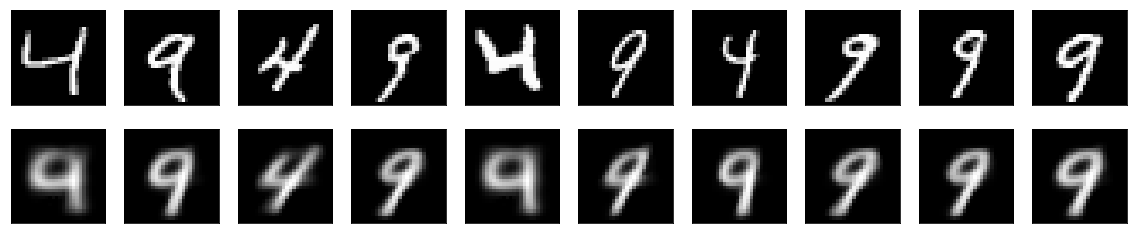

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

n = 10  # how many digits we will display

plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_train[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    predicted = model.predict(x_train_vec[i:i+1]).reshape((28,28))
    plt.imshow(predicted)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

４については上がくっついて９になりかけているものもあるが、なかなか頑張っているのではないだろうか。なぜかというと、理想的には、上の段が”４”だった場合下の段には”平均的な４”、上の段が”９”だった場合下の段には”平均的な９”が表れてくれるとうれしい。しかし実際には４のなかにも相当ばらつきがあるため、再表現出力の形状は、入力の形に引っ張られるように動いてしまう。とはいえ”９”の再表現は互いにかなり揃っていて良いと思う。

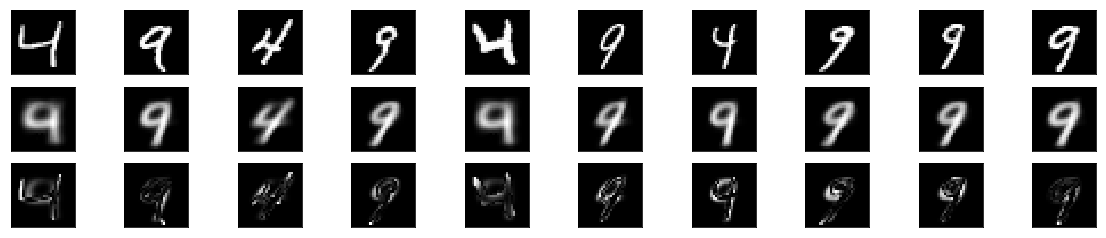

In [16]:
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    indata = x_train[i].reshape(28, 28)
    plt.imshow(indata)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    predicted = model.predict(x_train_vec[i:i+1]).reshape((28,28))
    plt.imshow(predicted)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow((indata - predicted)**2)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

入力から再表現を引き算したもの（の2乗）を3段目に並べた。再表現は集合全体を考慮して計算した予測値のようなものだから、入力が極端に予測から外れれば、外れた部分が差として際立って表される。これは使い方によっては役立つ可能性がある。